In [29]:
#Importing required packeges

from nsepy import get_history
from datetime import date
import numpy as np 
import pandas as pd
import matplotlib.pyplot
%matplotlib inline

# Dataset selection:
Use: https://github.com/swapniljariwala/nsepy
Source OCLHV data for NSE stocks (INFY,TCS) between 2015-2016. Data level - Daily.
Source OCLHV data for NIFTY IT index. Data level - Daily.

In [30]:
#Loading datasets

stock_infy = get_history(symbol='INFY',start=date(2015,1,1),end=date(2017,1,1))
stock_tcs = get_history(symbol='TCS',start=date(2015,1,1),end=date(2017,1,1))
index_nifty = get_history(symbol='NIFTY IT',start=date(2015,1,1),end=date(2017,1,1),index=True)

# Part 1:

In [31]:
# 1. Create 4,16,....,52 week moving average(closing price) for each stock and index. This should happen through a function.
# define a function mov_avg to calculate moving average and plot it.
def mov_avg(df):
    df.index = pd.to_datetime(df.index)
    temp = pd.DataFrame()
    temp['Close'] = df.Close.resample('W').mean()
    #print(temp.Close.head())
    for i in range(4,53,12):          # calculating moving average for diff window size.
        temp['Close_'+str(i)] =  temp.Close.rolling(window=i).mean()
    print(temp[['Close','Close_4','Close_16','Close_28','Close_40','Close_52']].head(20))
    temp[['Close','Close_4','Close_16','Close_28','Close_40','Close_52']].plot()       #plotting the moving averageand Close column
    




Table With Calculated Moving Average + plot for Moving averages for weeks = [4,16,28,40,52]

                  Close      Close_4     Close_16  Close_28  Close_40  \
Date                                                                    
2015-01-04  1993.800000          NaN          NaN       NaN       NaN   
2015-01-11  1992.310000          NaN          NaN       NaN       NaN   
2015-01-18  2117.210000          NaN          NaN       NaN       NaN   
2015-01-25  2161.620000  2066.235000          NaN       NaN       NaN   
2015-02-01  2142.112500  2103.313125          NaN       NaN       NaN   
2015-02-08  2164.980000  2146.480625          NaN       NaN       NaN   
2015-02-15  2283.870000  2188.145625          NaN       NaN       NaN   
2015-02-22  2295.762500  2221.681250          NaN       NaN       NaN   
2015-03-01  2279.383333  2255.998958          NaN       NaN       NaN   
2015-03-08  2277.950000  2284.241458          NaN       NaN       NaN   
2015-03-15  2201.790000  2263.721458          NaN       NaN       NaN   
2015-03-22  2244.910000  2251.008333          NaN  

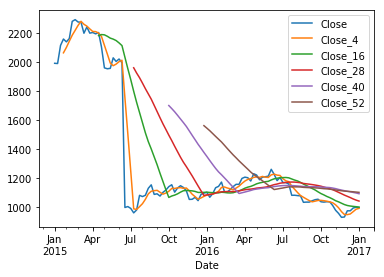

In [32]:
mov_avg(stock_infy)

                  Close      Close_4     Close_16  Close_28  Close_40  \
Date                                                                    
2015-01-04  2562.500000          NaN          NaN       NaN       NaN   
2015-01-11  2472.130000          NaN          NaN       NaN       NaN   
2015-01-18  2520.160000          NaN          NaN       NaN       NaN   
2015-01-25  2508.480000  2515.817500          NaN       NaN       NaN   
2015-02-01  2517.087500  2504.464375          NaN       NaN       NaN   
2015-02-08  2542.980000  2522.176875          NaN       NaN       NaN   
2015-02-15  2482.970000  2512.879375          NaN       NaN       NaN   
2015-02-22  2644.262500  2546.825000          NaN       NaN       NaN   
2015-03-01  2677.941667  2587.038542          NaN       NaN       NaN   
2015-03-08  2721.962500  2631.784167          NaN       NaN       NaN   
2015-03-15  2619.490000  2665.914167          NaN       NaN       NaN   
2015-03-22  2582.510000  2650.476042          NaN  

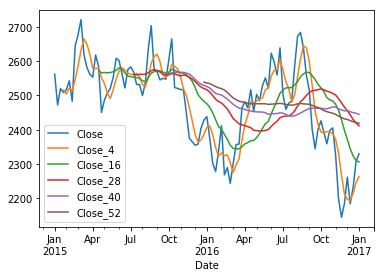

In [33]:
mov_avg(stock_tcs)

                Close      Close_4      Close_16  Close_28  Close_40  Close_52
Date                                                                          
2015-01-04  11293.900          NaN           NaN       NaN       NaN       NaN
2015-01-11  11108.450          NaN           NaN       NaN       NaN       NaN
2015-01-18  11598.040          NaN           NaN       NaN       NaN       NaN
2015-01-25  11777.490  11444.47000           NaN       NaN       NaN       NaN
2015-02-01  11787.975  11567.98875           NaN       NaN       NaN       NaN
2015-02-08  12055.970  11804.86875           NaN       NaN       NaN       NaN
2015-02-15  12298.500  11979.98375           NaN       NaN       NaN       NaN
2015-02-22  12603.925  12186.59250           NaN       NaN       NaN       NaN
2015-03-01  12567.350  12381.43625           NaN       NaN       NaN       NaN
2015-03-08  12728.925  12549.67500           NaN       NaN       NaN       NaN
2015-03-15  12383.090  12570.82250           NaN    

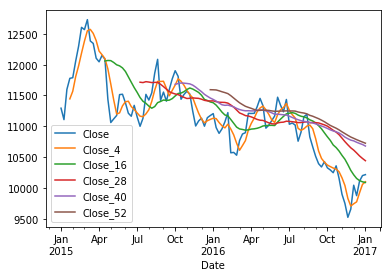

In [34]:
mov_avg(index_nifty)

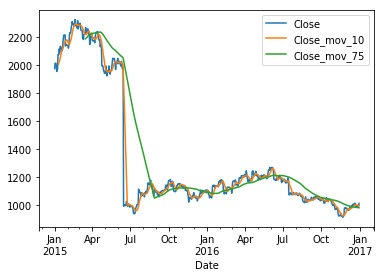

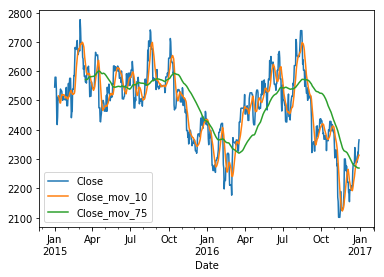

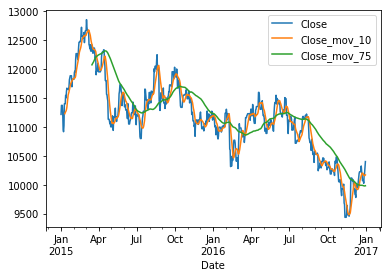

In [35]:
#Create rolling window of size 10 on each stock/index. Handle unequal time series due to stock market holidays.
#You should look to increase your rolling window size to 75 and see how the data looks like.

def rol_win(df):
    temp = pd.DataFrame()
    temp['Close'] = df.Close.asfreq('D',method='ffill')        # for handleing unequal time series we use asfreq function
    temp['Close_mov_10'] = temp.Close.rolling(window=10).mean()
    temp['Close_mov_75'] = temp.Close.rolling(window=75).mean()
    temp.plot()
    
rol_win(stock_infy)
rol_win(stock_tcs)
rol_win(index_nifty)

from 2 rolling window (10,75), we can see that as size of rolling window increase the moving average become more smooth.

In [36]:
stock_tcs = stock_tcs.asfreq('D', method ='pad')        # pad-ffill : forward-fill
stock_infy = stock_infy.asfreq('D', method ='pad')
index_nifty = index_nifty.asfreq('D', method ='pad')

3. Create the following dummy time series:

In [37]:
#3.1 Volume shocks - If volume traded is 10% higher/lower than previous day - make a 0/1 boolean time series for shock,
# 0/1 dummy-coded time series for direction of shock.


def direction(temp):
    """direction function is for calculating direction of shock"""
    # considerng only shock - 1 valued rows.
    # 0 - negative and 1- positive
    if (temp < -10):
        return 0
    else:
        if temp > 10:
            return 1
        else:
            return np.nan

def convert(x):
    """convert function for calculating Volume_sock"""
    if x > 10:
        return 1
    else:
        return 0

def vol_shock(df):
    shifted = df.Volume.shift()
    calculator = abs(((shifted - df.Volume)/df.Volume)*100)
    df['Volume_shock'] = calculator.apply(convert)
    temp = ((shifted - df.Volume)/df.Volume)*100
    df['Volume_shock_dir'] = temp.apply(direction)
    #df['Volume_shock_dir'] = df.apply(vol_shock_dir,axis=1)
    
vol_shock(stock_infy)
vol_shock(stock_tcs)
vol_shock(index_nifty)

In [38]:
print(stock_infy.head(10))
print(stock_tcs.head(10))
print(index_nifty.head(10))

           Symbol Series  Prev Close     Open     High      Low     Last  \
Date                                                                       
2015-01-01   INFY     EQ     1972.55  1968.95  1982.00  1956.90  1971.00   
2015-01-02   INFY     EQ     1974.40  1972.00  2019.05  1972.00  2017.95   
2015-01-03   INFY     EQ     1974.40  1972.00  2019.05  1972.00  2017.95   
2015-01-04   INFY     EQ     1974.40  1972.00  2019.05  1972.00  2017.95   
2015-01-05   INFY     EQ     2013.20  2009.90  2030.00  1977.50  1996.00   
2015-01-06   INFY     EQ     1995.90  1980.00  1985.00  1934.10  1965.10   
2015-01-07   INFY     EQ     1954.20  1965.00  1974.75  1950.00  1966.05   
2015-01-08   INFY     EQ     1963.55  1985.60  1997.00  1950.00  1979.25   
2015-01-09   INFY     EQ     1973.45  1980.10  2109.00  1913.05  2075.30   
2015-01-10   INFY     EQ     1973.45  1980.10  2109.00  1913.05  2075.30   

              Close     VWAP    Volume      Turnover  Trades  \
Date                   

In [39]:
#3.2 Price shocks - If closing price at T vs T+1 has a difference > 2%, then 0/1 boolean time series for shock,
# 0/1 dummy-coded time series for direction of shock.
#3.3 Pricing black swan - If closing price at T vs T+1 has a difference > 2%, then 0/1 boolean time series for shock, 
# 0/1 dummy-coded time series for direction of shock.

def direction(temp):
    """direction function is for calculating direction of shock
     considerng only shock - 1 valued rows.
     0 - negative and 1- positive"""
    if (temp < -2):
        return 0
    else:
        if temp > 2:
            return 1
        else:
            return np.nan

def convert(x):
    """convert function for calculating Volume_sock"""
    if x > 2:
        return 1
    else:
        return 0

def price_shock(df):
    shifted = df.Close.shift()
    calculator = abs(((shifted - df.Close)/df.Close)*100)
    df['Price_shock'] = calculator.apply(convert)
    df['Price_black_swan'] = df.Price_shock
    temp = ((shifted - df.Close)/df.Close)*100
    df['Price_shock_dir'] = temp.apply(direction)
    df['Price_black_swan_dir'] = df['Price_shock_dir']
    #df['Volume_shock_dir'] = df.apply(vol_shock_dir,axis=1)
    
price_shock(stock_infy)
price_shock(stock_tcs)
price_shock(index_nifty)

In [40]:
print(stock_infy.head(10))
print(stock_tcs.head(10))
print(index_nifty.head(10))

           Symbol Series  Prev Close     Open     High      Low     Last  \
Date                                                                       
2015-01-01   INFY     EQ     1972.55  1968.95  1982.00  1956.90  1971.00   
2015-01-02   INFY     EQ     1974.40  1972.00  2019.05  1972.00  2017.95   
2015-01-03   INFY     EQ     1974.40  1972.00  2019.05  1972.00  2017.95   
2015-01-04   INFY     EQ     1974.40  1972.00  2019.05  1972.00  2017.95   
2015-01-05   INFY     EQ     2013.20  2009.90  2030.00  1977.50  1996.00   
2015-01-06   INFY     EQ     1995.90  1980.00  1985.00  1934.10  1965.10   
2015-01-07   INFY     EQ     1954.20  1965.00  1974.75  1950.00  1966.05   
2015-01-08   INFY     EQ     1963.55  1985.60  1997.00  1950.00  1979.25   
2015-01-09   INFY     EQ     1973.45  1980.10  2109.00  1913.05  2075.30   
2015-01-10   INFY     EQ     1973.45  1980.10  2109.00  1913.05  2075.30   

              Close     VWAP    Volume      Turnover  Trades  \
Date                   

In [41]:
# 3.4 Pricing shock without volume shock - based on points a & b - Make a 0/1 dummy time series.

def shock(df):
    if (df.Price_shock == 1) and (df.Volume_shock == 0):
        return 1
    else:
        return 0

stock_infy['Price_shock_without_Volume_shock'] = stock_infy.apply(shock,axis=1)
stock_tcs['Price_shock_without_Volume_shock'] = stock_tcs.apply(shock,axis=1)
index_nifty['Price_shock_without_Volume_shock'] = index_nifty.apply(shock,axis=1)

In [42]:
print(stock_infy.head(10))
print(stock_tcs.head(10))
print(index_nifty.head(10))

           Symbol Series  Prev Close     Open     High      Low     Last  \
Date                                                                       
2015-01-01   INFY     EQ     1972.55  1968.95  1982.00  1956.90  1971.00   
2015-01-02   INFY     EQ     1974.40  1972.00  2019.05  1972.00  2017.95   
2015-01-03   INFY     EQ     1974.40  1972.00  2019.05  1972.00  2017.95   
2015-01-04   INFY     EQ     1974.40  1972.00  2019.05  1972.00  2017.95   
2015-01-05   INFY     EQ     2013.20  2009.90  2030.00  1977.50  1996.00   
2015-01-06   INFY     EQ     1995.90  1980.00  1985.00  1934.10  1965.10   
2015-01-07   INFY     EQ     1954.20  1965.00  1974.75  1950.00  1966.05   
2015-01-08   INFY     EQ     1963.55  1985.60  1997.00  1950.00  1979.25   
2015-01-09   INFY     EQ     1973.45  1980.10  2109.00  1913.05  2075.30   
2015-01-10   INFY     EQ     1973.45  1980.10  2109.00  1913.05  2075.30   

              Close     VWAP    Volume                ...                 \
Date       

In [43]:
# importing required packages

import bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.io import show, output_notebook
output_notebook()

Loading BokehJS ...

# Task 2:

1. Create timeseries plot of close prices of stocks/indices with the following features:
2. Color timeseries in simple blue color.
3. Color timeseries between two volume shocks in a different color (Red)
4. Gradient color in blue spectrum based on difference of 52 week moving average.
5. Mark closing Pricing shock without volume shock to identify volumeless price movement.

In [44]:
def bokeh_plot(stock):
    
    p = figure(plot_width=800, plot_height=500,  title = 'time series for '+ stock.name, x_axis_type="datetime")
    p.line(stock.index, stock.Close, color='blue', alpha=0.5)
    
    p.circle(stock.index, stock.Close*stock.Volume_shock,color='red', size=5, legend='vol shocks')
    
    temp = pd.DataFrame()
    temp['Close'] = stock.Close.resample('W').mean()
    temp['Close_52'] =  temp.Close.rolling(window=52).mean()
    p.line(temp.index, temp.Close_52, color='blue')
    
    #show price shock w/o vol shock
    
    p.circle(stock.index, stock.Close*stock.Price_shock_without_Volume_shock,color='blue', size=7, legend='price shock without vol shock')
    output_file(stock.name+'.html')
    show(p)
    

def bokeh_plot1(stock):
    
    p = figure(plot_width=800, plot_height=500,  title = 'time series for ', x_axis_type="datetime")
    p.line(stock.index, stock.Close, color='blue', alpha=0.5)
    stock['Volume_shock1'] = 0
    i = 0
    while(i != len(stock)):
        if stock.Volume_shock.iloc[i] == 1:
            stock['Volume_shock1'].iloc[i] = stock.Close.iloc[i]
            i+= 1
            if i==len(stock):
                break
            while(stock.Volume_shock.iloc[i]==0):
                if i==len(stock):
                    break
                stock['Volume_shock1'].iloc[i] = stock.Close.iloc[i]
                i+= 1
            i+= 1
            if i==len(stock):
                break
            while(stock.Volume_shock.iloc[i]==0):
                if i==len(stock):
                    break
                i+= 1
        else:
            i+= 1
        
    temp = pd.DataFrame()
    temp['value'] = stock.Volume_shock1[stock.Volume_shock1 != 0]
    p.line(temp.index, temp.value, color='red')
    show(p)
stock_infy.name = 'INFY'
#print(len(stock_infy))
bokeh_plot1(stock_infy.iloc[:20])

In [45]:
stock_infy.name = 'INFY'
stock_tcs.name = 'TCS'
index_nifty.name = 'NIFTY'
bokeh_plot(stock_infy)
bokeh_plot(stock_tcs)
bokeh_plot(index_nifty)

6. Hand craft partial autocorrelation plot for each stock/index on upto all lookbacks on bokeh

In [46]:
from statsmodels.tsa.stattools import acf, pacf

def draw_pacf(stock):
    
    lags = 50

    x = list(range(lags))

    p = figure(plot_height=500, title="Partial Autocorrelation PLot "+ stock.name)

    partial_autocorr = pacf(stock["Close"], nlags=lags)
    p.vbar(x=x, top=partial_autocorr, width=0.9)
    output_file(stock.name+'_pacf.html')
    show(p)

In [47]:
draw_pacf(stock_infy)
draw_pacf(stock_tcs)
draw_pacf(index_nifty)

In [48]:
#loading datasets

stock_infy = get_history(symbol='INFY',start=date(2015,1,1),end=date(2017,1,1))
stock_tcs = get_history(symbol='TCS',start=date(2015,1,1),end=date(2017,1,1))
stock_infy.index = pd.to_datetime(stock_infy.index)
stock_tcs.index = pd.to_datetime(stock_tcs.index)

# Task 3:

In [49]:
# importing necessery modules

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV

1. Quick build any two models. Quick build is defined as grid search of less than 9 permutation combinations. You can choose the two options of multiple multivariate models from those mentioned below. The goal is to to predict INFY,TCS prices for tomorrow.  Models that you can choose:
    1.1 http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLars.html#sklearn.linear_model.LassoLars
    1.2 http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
    1.3 http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression
    1.4 http://scikit-learn.org/stable/modules/svm.html#regression
    1.5 http://scikit-learn.org/stable/modules/ensemble.html#regression

In [50]:
tscv = TimeSeriesSplit(n_splits=5)
def timeseries_train_test_split(X, y,test_size):
    size = int(len(X)*(1-test_size))
    X['year'] = X.index.year
    X['month'] = X.index.month
    X['week'] = X.index.week
    X['dayofweek'] = X.index.dayofweek
    X['day'] = X.index.day
    X = X[['year','month','week','dayofweek','day','Prev Close','Open','High','Low','Last','Volume']]
    X_train = X.iloc[:size]
    y_train = y.iloc[:size]
    X_test = X.iloc[size:]
    y_test = y.iloc[size:]
    return X_train,X_test,y_train,y_test


[0.99737952 0.99220127 0.30880245 0.9975332  0.99897686]
1.4368470287745263


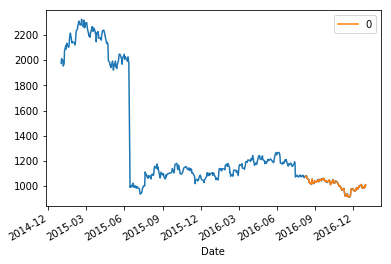

In [51]:
#training model for Infy dataset linearregression

X_train,X_test,y_train,y_test = timeseries_train_test_split(stock_infy.drop('Close',axis=1),stock_infy.Close,0.2)
lr = LinearRegression()
print(cross_val_score(lr,X_train,y_train,cv=tscv))
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred))
ax = stock_infy.Close.plot()
y_pred = pd.DataFrame(y_pred,index=y_test.index)
y_pred.plot(ax=ax)

[0.9883745  0.9943047  0.93768803 0.99591635 0.9969828 ]
4.147900057035106


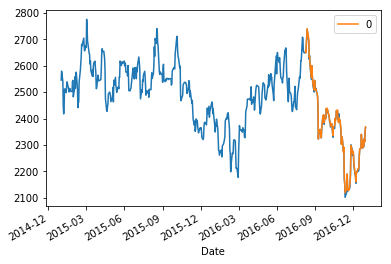

In [52]:
#training model for TCS dataset linearregression

X_train,X_test,y_train,y_test = timeseries_train_test_split(stock_tcs.drop('Close',axis=1),stock_tcs.Close,0.2)
lr = LinearRegression()
print(cross_val_score(lr,X_train,y_train,cv=tscv))
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(mean_absolute_error(y_test,y_pred))
ax2 = stock_tcs.Close.plot()
y_pred = pd.DataFrame(y_pred,index=y_test.index)
y_pred.plot(ax=ax2)

c:\users\augadh\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.060678e-16
  overwrite_a=True).T


1.4311792169812945


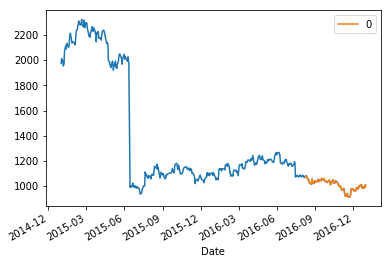

In [53]:
##training model for Infy dataset Ridge

X_train,X_test,y_train,y_test = timeseries_train_test_split(stock_infy.drop('Close',axis=1),stock_infy.Close,0.2)
rcv = RidgeCV(alphas=(0.1, 0.3, 1.0, 3.0, 10.0),cv=tscv)
rcv.fit(X_train,y_train)
y_pred = rcv.predict(X_test)
print(mean_absolute_error(y_test,y_pred))
ax = stock_infy.Close.plot()
y_pred = pd.DataFrame(y_pred,index=y_test.index)
y_pred.plot(ax=ax)

4.1266982842616695


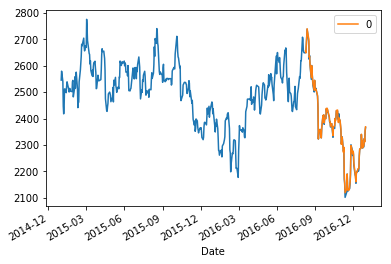

In [54]:
##training model for TCS dataset Ridge

X_train,X_test,y_train,y_test = timeseries_train_test_split(stock_tcs.drop('Close',axis=1),stock_tcs.Close,0.2)
rcv = RidgeCV(alphas=(0.1, 0.3, 1.0, 3.0, 10.0),cv=tscv)
rcv.fit(X_train,y_train)
y_pred = rcv.predict(X_test)
print(mean_absolute_error(y_test,y_pred))
ax2 = stock_tcs.Close.plot()
y_pred = pd.DataFrame(y_pred,index=y_test.index)
y_pred.plot(ax=ax2)

6. Extra credit - Nest a model to predict volume shock into your time series model - same conditions applied as above.

In [55]:
def convert(x):
    if x > 10:
        return 1
    else:
        return 0

def vol_shock(df):
    shifted = df.Volume.shift()
    calculator = abs(((shifted - df.Volume)/df.Volume)*100)
    df['Volume_shock'] = calculator.apply(convert)
    #df['Volume_shock_dir'] = df.apply(vol_shock_dir,axis=1)
    
vol_shock(stock_infy)
vol_shock(stock_tcs)

In [56]:
# training LogisticRegression model

from sklearn.linear_model import LogisticRegression
tscv = TimeSeriesSplit(n_splits=5)
def timeseries_train_test_split(X, y,test_size):
    size = int(len(X)*(1-test_size))
    X['year'] = X.index.year
    X['month'] = X.index.month
    X['week'] = X.index.week
    X['dayofweek'] = X.index.dayofweek
    X['day'] = X.index.day
    X = X[['year','month','week','dayofweek','day','Prev Close','Open','High','Low','Last']]
    X_train = X.iloc[:size]
    y_train = y.iloc[:size]
    X_test = X.iloc[size:]
    y_test = y.iloc[size:]
    return X_train,X_test,y_train,y_test


X_train,X_test,y_train,y_test = timeseries_train_test_split(stock_infy.drop('Volume_shock',axis=1),stock_infy.Volume_shock,0.2)
lr = LogisticRegression()
print(cross_val_score(lr,X_train,y_train,cv=tscv))
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(lr.score(X_test,y_test))


X_train,X_test,y_train,y_test = timeseries_train_test_split(stock_tcs.drop('Volume_shock',axis=1),stock_tcs.Volume_shock,0.2)
lr = LogisticRegression()
print(cross_val_score(lr,X_train,y_train,cv=tscv))
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(lr.score(X_test,y_test))

[0.40909091 0.83333333 0.83333333 0.78787879 0.77272727]
0.8484848484848485
[0.81818182 0.84848485 0.74242424 0.8030303  0.84848485]
0.8080808080808081
